<a href="https://colab.research.google.com/github/visahan1/Tensorflow/blob/main/FunctionalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:

#Functional API Tensorflow

#Use the Keras functional API to train a model to predict two outputs.
# **[Wine Quality Dataset]( )** from the **UCI machine learning repository**
# It has separate datasets for red wine and white wine.

#Normally, the wines are classified into one of the quality ratings specified in the attributes. 
#In this exercise, you will combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes. 

#You will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.



In [70]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import itertools


In [53]:

red_df = pd.read_csv('./winequality-red.csv',sep=';')
red_df['is_red'] = 1
white_df = pd.read_csv('./winequality-white.csv',sep=';')
white_df['is_red'] = 0
white_df.head()
#Next, concatenate the red and white wine dataframes.
df = pd.concat([red_df, white_df], ignore_index=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


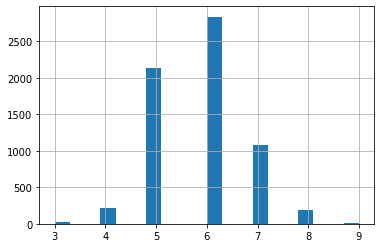

In [54]:
df['quality'].hist(bins=20)

In [55]:
  ## Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [63]:
  # split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.8, random_state = 1)
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.8, random_state = 1)
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [64]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)


In [69]:
train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2760,6.7,0.13,0.28,1.2,0.046,35.0,140.0,0.99270,3.33,0.33,10.1
1191,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9
3980,6.6,0.21,0.29,1.8,0.026,35.0,128.0,0.99183,3.37,0.48,11.2
3918,6.5,0.28,0.28,20.4,0.041,40.0,144.0,1.00020,3.14,0.38,8.7
3621,7.4,0.18,0.24,1.4,0.047,21.0,106.0,0.99383,3.52,0.64,10.5


In [71]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train)

In [72]:
scaled_test = scaler.transform(test)

In [75]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    x = Dense(units=128,activation='relu') (inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = Dense(units=128,activation='relu') (x)
    return x

You will add output layers to the base model. 
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.



In [76]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs,outputs=[wine_quality,wine_type])

    return model


In [87]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
                loss = {'wine_type' : tf.keras.losses.binary_crossentropy,
                      'wine_quality' : tf.keras.losses. mean_squared_error
                     },
              metrics = {'wine_type' : tf.keras.metrics.binary_accuracy,
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )    


In [104]:
# Train the model for 500 epochs
history = model.fit(scaled_train, train_Y,
                    epochs=200, batch_size=10, validation_data=(scaled_test, test_Y))

Epoch 1/200
25/25 [==============================] - 1s 49ms/step - loss: 0.1004 - wine_quality_loss: 0.0993 - wine_type_loss: 0.0011 - wine_quality_root_mean_squared_error: 0.3151 - wine_type_binary_accuracy: 1.0000 - val_loss: 0.7171 - val_wine_quality_loss: 0.6776 - val_wine_type_loss: 0.0395 - val_wine_quality_root_mean_squared_error: 0.8232 - val_wine_type_binary_accuracy: 0.9903
Epoch 2/200
25/25 [==============================] - 1s 59ms/step - loss: 0.1015 - wine_quality_loss: 0.1005 - wine_type_loss: 0.0011 - wine_quality_root_mean_squared_error: 0.3170 - wine_type_binary_accuracy: 1.0000 - val_loss: 0.7199 - val_wine_quality_loss: 0.6804 - val_wine_type_loss: 0.0395 - val_wine_quality_root_mean_squared_error: 0.8248 - val_wine_type_binary_accuracy: 0.9905
Epoch 3/200
25/25 [==============================] - 1s 59ms/step - loss: 0.0977 - wine_quality_loss: 0.0967 - wine_type_loss: 0.0011 - wine_quality_root_mean_squared_error: 0.3109 - wine_type_binary_accuracy: 1.0000 - val_l

In [105]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=scaled_test, y=test_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

152/152 [==============================] - 0s 3ms/step - loss: 0.7127 - wine_quality_loss: 0.6634 - wine_type_loss: 0.0492 - wine_quality_root_mean_squared_error: 0.8145 - wine_type_binary_accuracy: 0.9907

loss: 0.7126646041870117
wine_quality_loss: 0.6634278297424316
wine_type_loss: 0.049236513674259186
wine_quality_rmse: 0.8145107626914978
wine_type_accuracy: 0.9907082319259644


In [101]:
predictions = model.predict(scaled_test)
quality_pred = predictions[0]
type_pred = predictions[1]
print(quality_p red[0])

[6.340335]


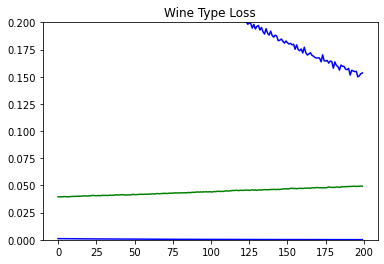

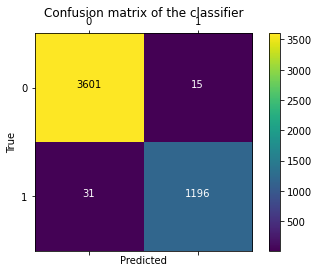

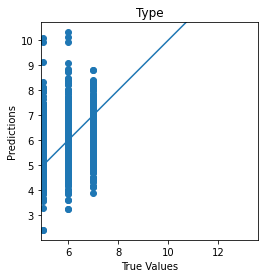

In [106]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

### Plots for Metrics

plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

### Plots for Confusion Matrix

#Plot the confusion matrices for wine type. You can see that the model performs well for prediction of wine type from the confusion matrix and the loss metrics.

plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')

